## Stochastic Gradient Descent
Use Keras and Tensorflow to train your first neural network.


Training the network means adjusting its weights in such a way that it can transform the features into the target.

In addition to the training data, we need two more things:
- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.


### The Loss Function
The loss function measures the disparity between the the target's true value and the value the model predicts.

A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).

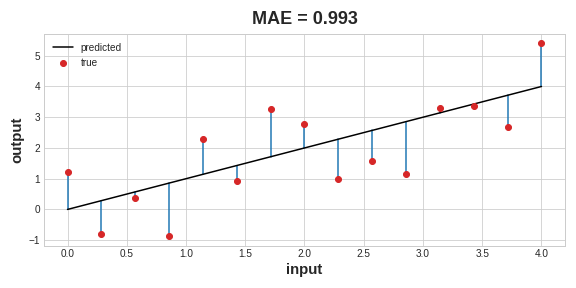




### The Optimizer - Stochastic Gradient Descent
We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually the optimization algo used in the deep learning belong to a family called `stochastic gradient descent`.
- They are iterative algorithms that train a network in steps. One step of training goes like this:
- Sample some training data and run it through the network to make predictions.
- Measure the loss between the predictions and the true values.
Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

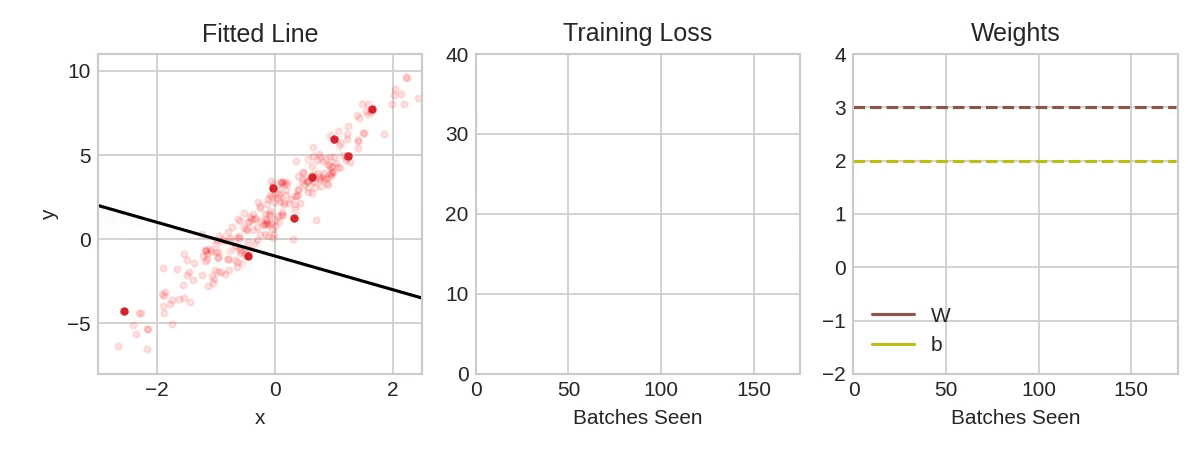

Each iterations sample of training data is called `minibatch` while a complete round of training data is called an `epoch`




### Learning Rate and Batch Size

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

```python
model.compile(
    optimizer="adam",
    loss="mae"
)

### Example - Red Wine Quality
Given Red Wine dataset which we will perform a target predictions on the quality.

```python
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=[11]),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu")
    layers.Dense(1)
])
```

Deciding the architecture of the model should be part of a process.

Start simple and use the `validation loss` as the guide.

After defining a model, compile in the optimizer and the loss functions
```python
mode.compile(
    optimizer="adam",
    loss="mae"
)
```

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).

```python
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)
```


You can think of training like finding the "best curve" that fits the relationship between input and target data, but:

- For simple regression models, it's just a straight line.
- For more complex models, it could be highly non-linear and multidimensional. The process is still powered by gradients guiding the optimization.
